# Importação das bibliotecas

In [74]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np

# Carrega o Dataset

In [58]:
mnist = fetch_mldata("MNIST original")

# Pré-processamento

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data / 255., mnist.target, test_size=0.25)

X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print('Got MNIST with %d training- and %d test samples' % (len(y_train), len(y_test)))
print('Digit distribution in whole dataset:', np.bincount(y.astype('int64')))



pca = PCA(svd_solver='randomized', whiten=True).fit(X_train)
#fig, plot = plt.subplots()
#fig.set_size_inches(50, 50)
#plt.prism()

X_transformed = pca.transform(X_train)
#X_transformed = pca.fit_transform(X_train)
#plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train)
#plot.set_xticks(())
#plot.set_yticks(())

#plt.tight_layout()
#plt.savefig("mnist_pca_n_components_16.png")

Got MNIST with 60000 training- and 10000 test samples
Digit distribution in whole dataset: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


In [2]:

## usar o PCA para fazer o redimensionamento das imagens e assim garantir o Pré-Processamento 
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Treinamento

Iteration 1, loss = 1.82521974
Iteration 2, loss = 1.55274106
Iteration 3, loss = 1.49404615
Iteration 4, loss = 1.25502967
Iteration 5, loss = 1.16602296
Iteration 6, loss = 1.11337068
Iteration 7, loss = 1.05795180
Iteration 8, loss = 1.02100686
Iteration 9, loss = 1.11945464
Iteration 10, loss = 1.04855652
Iteration 11, loss = 0.93018999
Iteration 12, loss = 1.00398475
Iteration 13, loss = 0.96788278
Iteration 14, loss = 1.04352786
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.120838
Test set score: 0.117771


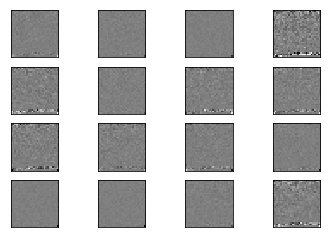

In [94]:
mlp = MLPClassifier(hidden_layer_sizes=(88,), activation='tanh', max_iter=30, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_transformed, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
#use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# Avaliação

In [95]:
scores = cross_val_score(mlp,X_transformed,y_train)
np.mean(scores)

Iteration 1, loss = 1.91447945
Iteration 2, loss = 1.56335052
Iteration 3, loss = 1.54491795
Iteration 4, loss = 1.45178442
Iteration 5, loss = 1.35413034
Iteration 6, loss = 1.36486568
Iteration 7, loss = 1.12331224
Iteration 8, loss = 1.07614999
Iteration 9, loss = 1.04193513
Iteration 10, loss = 1.04016403
Iteration 11, loss = 1.14524343
Iteration 12, loss = 1.18628533
Iteration 13, loss = 1.07101170
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.89269513
Iteration 2, loss = 1.49293708
Iteration 3, loss = 1.47305995
Iteration 4, loss = 1.32467209
Iteration 5, loss = 1.29238758
Iteration 6, loss = 1.28374971
Iteration 7, loss = 1.14806807
Iteration 8, loss = 1.09598582
Iteration 9, loss = 1.15547527
Iteration 10, loss = 1.08379133
Iteration 11, loss = 1.10378480
Iteration 12, loss = 1.11621496
Iteration 13, loss = 1.02791555
Iteration 14, loss = 0.91136532
Iteration 15, loss = 0.95714582
Iteration 16, loss = 0.96549840

0.58337178548240198

In [83]:
metrics.classification_report(y_test, mlp.predict(X_test))

'             precision    recall  f1-score   support\n\n        0.0       0.00      0.00      0.00      1726\n        1.0       0.00      0.00      0.00      1962\n        2.0       0.14      0.01      0.01      1719\n        3.0       0.04      0.00      0.01      1813\n        4.0       0.01      0.00      0.00      1814\n        5.0       0.08      0.02      0.03      1633\n        6.0       0.01      0.00      0.00      1637\n        7.0       0.05      0.30      0.09      1804\n        8.0       0.02      0.00      0.01      1671\n        9.0       0.16      0.49      0.24      1721\n\navg / total       0.05      0.08      0.04     17500\n'